<a href="https://colab.research.google.com/github/ahcamachod/1819-clustering-extrayendo-patrones-de-datos/blob/main/clustering_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Sistemas de recomendación en Python

El objetivo de este proyecto es implementar un sistema de recomendaciones




### **Del proyecto:** 231129-1_ml_intro_sistemas_recomendacion

### **Procedimientos:**
1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Importar bibliotecas de los métodos a utilizar
3. Cargar el dataset en un DataFrame
4. Consultar información sobre las variables del Dataframe
5. Preprocesamiento:
    - Eliminar variables innecesarias o que no permitan leer el dataframe
    - Tratamiento de variables con valores faltantes
    - Tratamiento de datos extremos y datos atípicos
    - Normalizar los valores de todas las variables
6. Descomposicion de la serie
    - Descomposicion de primer orden
    - Descomposición de segundo orden
7. Autocorrelación
8. Tendencia( Trend)
9. Componente estacional (Seasonality)
10. Componente estacionario (Stationary)
11. Componente aleatorio (Residual)


### **1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# pip install -r "/content/drive/MyDrive/Colab Notebooks/231103-1_machine_learning_clustering_extrayendo_patrones_datos/requirements.txt"

In [3]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

### **2. Importar bibliotecas de los métodos a utilizar**





In [4]:
# Las versiones de las bibliotecas que usaremos son las siguientes:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.7.1
pandas --> 1.5.3
numpy --> 1.23.5
seaborn --> 0.12.2
sklearn --> 1.2.2


### **3. Cargar los dataset en  dataframes**

In [5]:
# ¿Cual es la manera recomendada para fijar la ruta de un archivo dataset para cargarlo en Google Colab?
# Respuesta: Asignar la ruta a un string y pasarlo como parametro al método pd.read_csv()
movies_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231129-1_machine_learning_intro_sistemas_recomendacion_python/datasets/movies.csv'
datos_peliculas_df = pd.read_csv(movies_data_file_path)

In [6]:
ratings_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231129-1_machine_learning_intro_sistemas_recomendacion_python/datasets/ratings.csv'
datos_notas_df = pd.read_csv(ratings_data_file_path)


### **4. Consultar información sobre las variables del Dataframe**

In [7]:
datos_peliculas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Para un analisis de una serie temporal se requiere que la variable fecha sea de tipo datetime

In [8]:
datos_peliculas_df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### **5. Preprocesamiento**

**Transformación:** Cambiamos el tipo de dato de la variable fecha de cadena de caracteres a datetime

In [9]:
datos_peliculas_df.columns = ['peliculaId','titulo','generos']
datos_peliculas_df = datos_peliculas_df.set_index('peliculaId')
datos_peliculas_df.head()

,titulo,generos
peliculaId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [10]:
datos_peliculas_df.describe()

,titulo,generos
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [11]:
datos_notas_df.columns = ['usuarioId','peliculaId','nota','momento']
datos_notas_df.head()

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
datos_notas_df.describe()

,usuarioId,peliculaId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### **6.Primera enfoque: Sistema de recomendacion por cantidad total de votos**

In [13]:
datos_notas_df.value_counts("peliculaId")

peliculaId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Length: 9724, dtype: int64

In [14]:
datos_peliculas_df.loc[356]

titulo          Forrest Gump (1994)
generos    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [15]:
total_de_votos = datos_notas_df.value_counts("peliculaId")

In [16]:
datos_peliculas_df['total_de_votos'] = total_de_votos
datos_peliculas_df.sort_values('total_de_votos', ascending=False).head(10)

,titulo,generos,total_de_votos
peliculaId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


### **7.Segundo enfoque: Sistema de recomendación por promedio de mas alto de calificaciones**

In [17]:
media_votos = datos_notas_df.groupby('peliculaId').mean()['nota']
datos_peliculas_df['media_votos'] = media_votos
datos_peliculas_df.head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [18]:
datos_peliculas_df.sort_values('total_de_votos', ascending=False).head(10)

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


In [19]:
peliculas_con_mas_50_votos = datos_peliculas_df.query('total_de_votos >=50')
peliculas_con_mas_50_votos.sort_values('media_votos', ascending=False).head(10)

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


**Lo importante en esta sección:**

- Utilizar el value_count() para contar la frecuencia
- Alterar el índice con la función set_index()
- Usar la función loc[] para localizar registros
- Realizar una inclusión de una columna nueva
- Ordenar valores con la función sort_values y usando como parámetro el ascending = False para definir en orden - decreciente.
- Agrupar los datos con la función gorupby() para luego calcular la media con mean()

### **8.Tercer enfoque: Recomendación basada en similaridad de género**

In [20]:
peliculas_que_mire = [1,19,21,10,2]
datos_peliculas_df.loc[peliculas_que_mire]

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [21]:
aventura_infantil_fantasia = peliculas_con_mas_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_fantasia.drop(peliculas_que_mire, errors='ignore').sort_values('media_votos',ascending=False).head(10)

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


**Lo importante en esta sección:**

- Realizar un filtro de datos con la función query()
- Comparar dos tablas y eliminar los datos repetidos
- Utilizar el parámetro errors="ignore" para ignorar cualquier error en la función drop()
- Concepto de los principales abordajes de recomendación Collaborative Filtering y Base-Content Filtering

### **9.Collaborative filtering vs Based-content filtering**

**Calculando las distancias entre usuarios**

In [ ]:
#Juan - 5
#Christian - 4
#Sergio - 3.5

#Juan - Christian = 1
#Christian - Sergio = 0.5


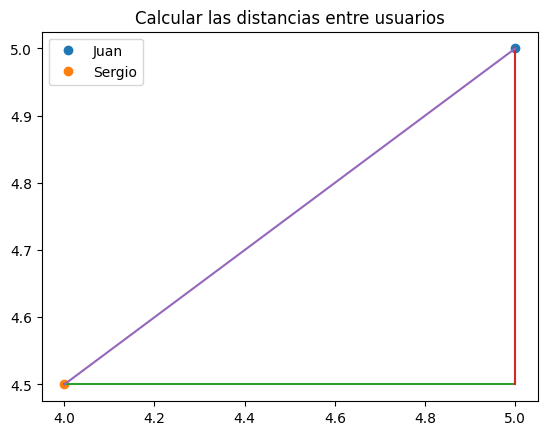

In [22]:
#Juan = [5,5]
#Sergio - [4,4.5]

import matplotlib.pyplot as plt

plt.plot(5,5,"o")
plt.plot(4,4.5,"o")
plt.legend(['Juan','Sergio'])
plt.title('Calcular las distancias entre usuarios')

plt.plot([4,5],[4.5,4.5],linestyle="-")
plt.plot([5,5],[4.5,5],linestyle="-")
plt.plot([4,5],[4.5,5],linestyle="-")

In [23]:
import numpy as np

juan = np.array([5,5])
sergio = np.array([4,4.5])

juan - sergio


array([1. , 0.5])

In [24]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x*delta_x + delta_y*delta_y)

In [25]:
pitagoras(juan,sergio)

1.118033988749895

In [26]:
np.linalg.norm(juan-sergio)

1.118033988749895

In [27]:
from math import sqrt

def distancia(a,b):
  return np.linalg.norm(a-b)

In [28]:
distancia(juan,sergio)

1.118033988749895

Text(0.5, 1.0, 'Calcular las distancias entre usuarios')

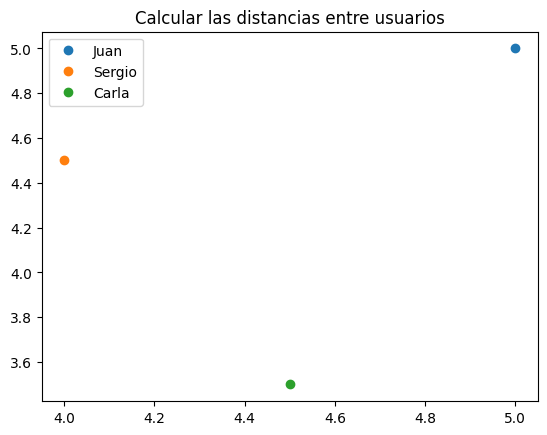

In [29]:
plt.plot(5,5,"o")
plt.plot(4,4.5,"o")
plt.plot(4.5,3.5,"o")
plt.legend(['Juan','Sergio','Carla'])
plt.title('Calcular las distancias entre usuarios')

In [30]:
juan = np.array([5,5,4.5])
sergio = np.array([4,4.5,5])
carla = np.array([4.5,3.5,5])

print(distancia(juan,sergio))
print(distancia(sergio,carla))
print(distancia(juan,carla))


1.224744871391589
1.118033988749895
1.6583123951777


In [32]:
datos_notas_df.head()

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
usuario1 = datos_notas_df.query("usuarioId==1")[['peliculaId','nota']].set_index('peliculaId')
usuario4 = datos_notas_df.query("usuarioId==4")[['peliculaId','nota']].set_index('peliculaId')

diferencias = usuario1.join(usuario4, lsuffix='_izq', rsuffix='_der').dropna()
distancia(diferencias['nota_izq'],diferencias['nota_der'])

11.135528725660043

In [34]:
def notas_del_usuario(usuarioId):
  notas_del_usuario = datos_notas_df.query("usuarioId==%d" % usuarioId )[['peliculaId','nota']]
  notas_del_usuario = notas_del_usuario.set_index('peliculaId')
  return notas_del_usuario


In [35]:
def diferencia_de_vectores(a,b):
  return np.linalg.norm(a-b)

In [36]:
def distancia_entre_usuarios(usuario_id1,usuario_id2):
  notas1 = notas_del_usuario(usuario_id1)
  notas2 = notas_del_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix='_izq', rsuffix='_der').dropna()
  return diferencia_de_vectores(diferencias['nota_izq'],diferencias['nota_der'])

In [37]:
distancia_entre_usuarios(1,6)

8.602325267042627

**Lo importante en esta sección:**

- Buscar datos similares en relación a las características de los mismos
- Mostrar gráficamente la distancia entre los datos
- Utilizar la función sqrt() para calcular la raíz cuadrada
- Crear un array de numpy para realizar la sustracción de listas
- Utilizar la función np_linalg.norm para generar el valor de las distancias
- Utilizar la función join() para juntar datos
- Utilizar los parámetros lsuffix y rsuffix para juntar datos adyacentes.
- Usar la función dropna() para eliminar valores nulos

### **10.Calculando la distacia de todos**